In [1032]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score,f1_score,accuracy_score,precision_score, recall_score
from sklearn.neighbors import LocalOutlierFactor

In [1033]:
df = pd.read_csv("diabetes.csv")

In [1034]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [1035]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [1036]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [1037]:
print(f"The shape of the dataset:{df.shape}")

The shape of the dataset:(768, 9)


In [1038]:
df["Outcome"].value_counts()*100/len(df)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [1039]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Axes: xlabel='Age', ylabel='Count'>

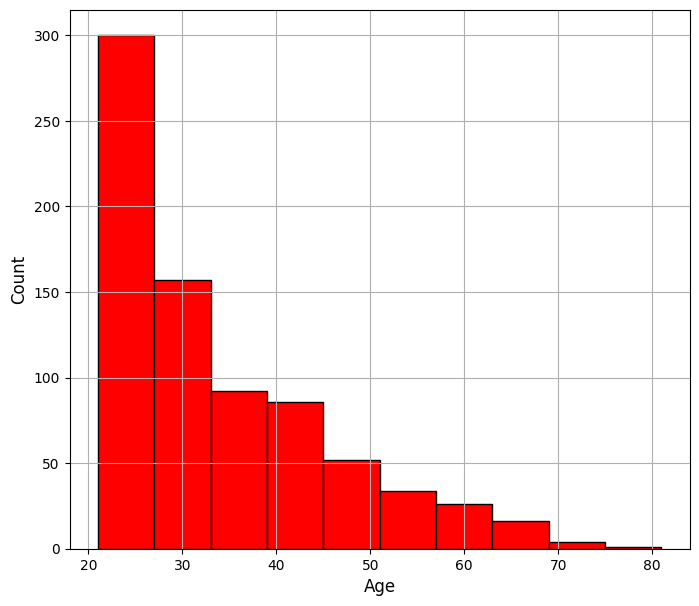

In [1040]:
plt.figure(figsize = (8,7))
plt.xlabel("Age",fontsize = 12)
plt.ylabel("Count",fontsize = 12)
df["Age"].hist(edgecolor = "black",color = "red")

In [1041]:
print(f"Max age: {str(df['Age'].max())}, Min age: {str(df['Age'].min())}")

Max age: 81, Min age: 21


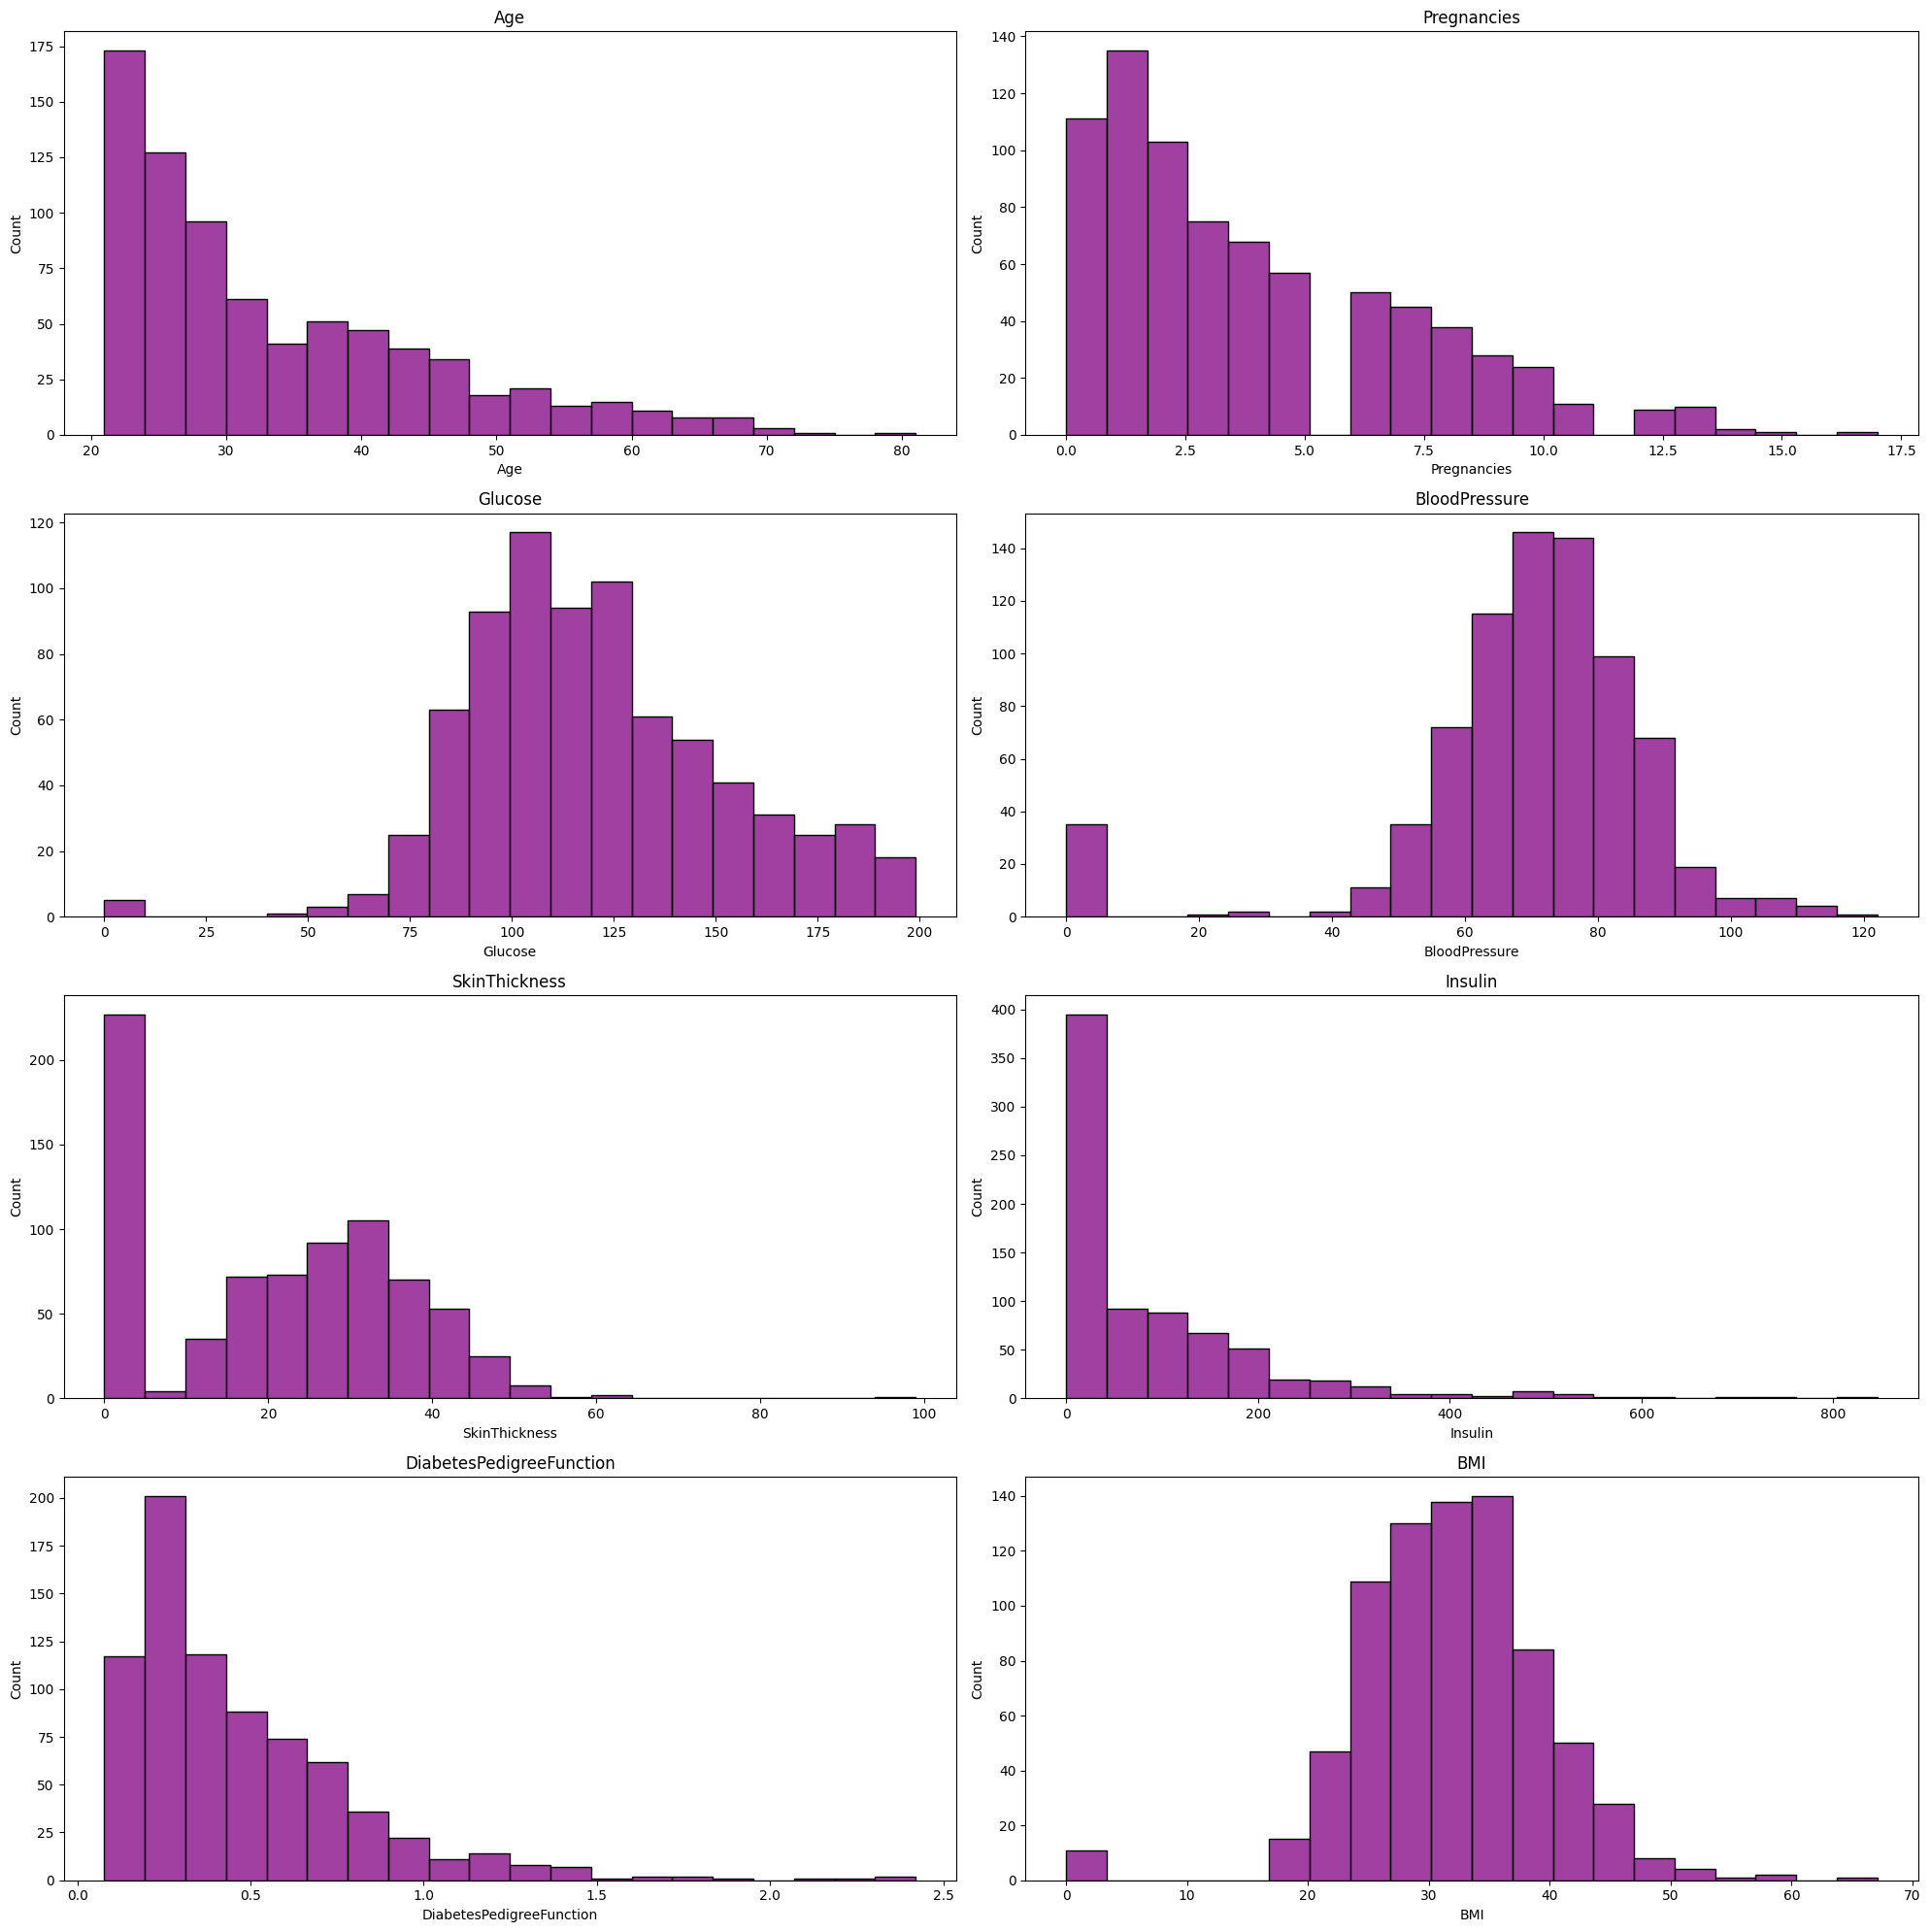

In [1042]:
num_cols = ["Age","Pregnancies","Glucose","BloodPressure", "SkinThickness", "Insulin", "DiabetesPedigreeFunction", "BMI"]

fig, ax = plt.subplots(4, 2, figsize=(20, 20))

for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=20, ax=ax[i//2, i%2], color="purple")
    ax[i//2, i%2].set_title(col)

plt.tight_layout()
plt.show()

In [1043]:

col = "Pregnancies"
result_df = df.groupby("Outcome").agg({col: ["mean", "max"]})
result_df.columns = [f"{col}_mean", f"{col}_max"]

result_df



,Pregnancies_mean,Pregnancies_max
Outcome,,
0,3.298000,13
1,4.865672,17


In [1044]:
col = "Age"
result_df = df.groupby("Outcome").agg({col: ["mean", "max"]})
result_df.columns = [f"{col}_mean", f"{col}_max"]

result_df

,Age_mean,Age_max
Outcome,,
0,31.190000,81
1,37.067164,70


In [1045]:
col = "Glucose"
result_df = df.groupby("Outcome").agg({col: ["mean", "max"]})
result_df.columns = [f"{col}_mean", f"{col}_max"]

result_df

,Glucose_mean,Glucose_max
Outcome,,
0,109.980000,197
1,141.257463,199


In [1046]:
col = "BloodPressure"
result_df = df.groupby("Outcome").agg({col: ["mean", "max"]})
result_df.columns = [f"{col}_mean", f"{col}_max"]

result_df

,BloodPressure_mean,BloodPressure_max
Outcome,,
0,68.184000,122
1,70.824627,114


In [1047]:
col = "SkinThickness"
result_df = df.groupby("Outcome").agg({col: ["mean", "max"]})
result_df.columns = [f"{col}_mean", f"{col}_max"]

result_df

,SkinThickness_mean,SkinThickness_max
Outcome,,
0,19.664000,60
1,22.164179,99


In [1048]:
col = "Insulin"
result_df = df.groupby("Outcome").agg({col: ["mean", "max"]})
result_df.columns = [f"{col}_mean", f"{col}_max"]

result_df

,Insulin_mean,Insulin_max
Outcome,,
0,68.792000,744
1,100.335821,846


In [1049]:
col = "DiabetesPedigreeFunction"
result_df = df.groupby("Outcome").agg({col: ["mean", "max"]})
result_df.columns = [f"{col}_mean", f"{col}_max"]

result_df

,DiabetesPedigreeFunction_mean,DiabetesPedigreeFunction_max
Outcome,,
0,0.429734,2.329
1,0.550500,2.420


In [1050]:
col = "BMI"
result_df = df.groupby("Outcome").agg({col: ["mean", "max"]})
result_df.columns = [f"{col}_mean", f"{col}_max"]

result_df

,BMI_mean,BMI_max
Outcome,,
0,30.304200,57.3
1,35.142537,67.1


In [1051]:
outcome_counts = df["Outcome"].value_counts()
diab = outcome_counts[0]
non_diab = outcome_counts[1]

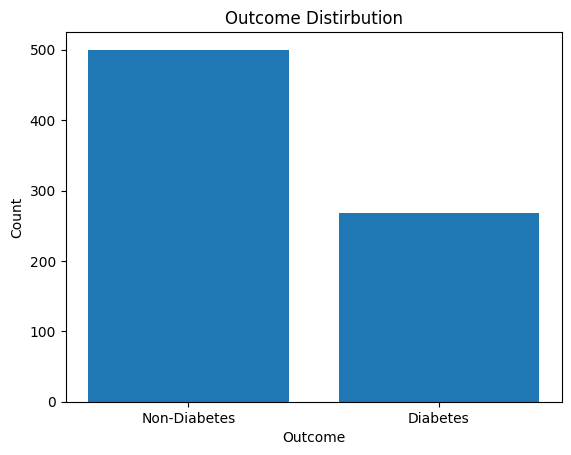

In [1052]:
plt.bar(outcome_counts.index,outcome_counts.values)
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.xticks([0,1],["Non-Diabetes","Diabetes"],ha='center')
plt.title("Outcome Distirbution")
plt.show()

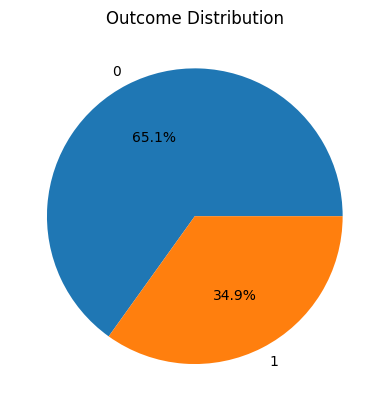

In [1053]:
plt.pie(outcome_counts.values, labels=outcome_counts.index, autopct='%1.1f%%')
plt.title("Outcome Distribution")
plt.show()

<Axes: >

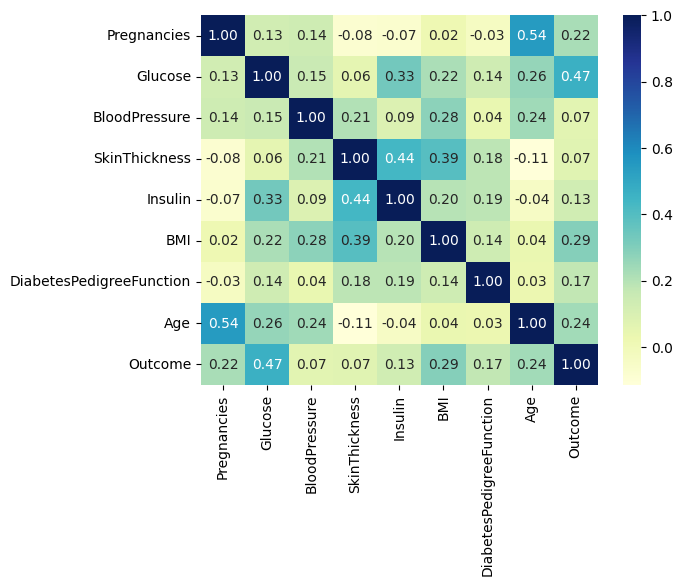

In [1054]:
sns.heatmap(df.corr(), cmap="YlGnBu",annot = True,fmt = '.2f')

**Data Preprocessing**

**Dealing with missing values**

In [1055]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**We see on df.head() that some features contain 0, it doesn't make sense here and indicates a missing values**


In [1056]:
df[["Glucose","Pregnancies","BloodPressure","Insulin","BMI","DiabetesPedigreeFunction","Age"]] = df[["Glucose","Pregnancies","BloodPressure","Insulin","BMI","DiabetesPedigreeFunction","Age"]].replace(0,np.nan)

In [1057]:
df.isna().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness                 0
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [1058]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,0,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48,180.0,32.9,0.171,63,0
764,2.0,122.0,70.0,27,NaN,36.8,0.340,27,0
765,5.0,121.0,72.0,23,112.0,26.2,0.245,30,0
766,1.0,126.0,60.0,0,NaN,30.1,0.349,47,1


In [1059]:
columns = df.columns
columns_without_target = columns.drop("Outcome")

for col in columns_without_target:
    imputer = SimpleImputer(strategy="median")
    df.loc[df['Outcome'] == 0, col] = imputer.fit_transform(df[df['Outcome'] == 0][[col]]).ravel()
    df.loc[df['Outcome'] == 1, col] = imputer.fit_transform(df[df['Outcome'] == 1][[col]]).ravel()

    

In [1060]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48,180.0,32.9,0.171,63,0
764,2.0,122.0,70.0,27,102.5,36.8,0.340,27,0
765,5.0,121.0,72.0,23,112.0,26.2,0.245,30,0
766,1.0,126.0,60.0,0,169.5,30.1,0.349,47,1


Outlier Observation Analysis

In [1061]:
for feature in df:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    LQR = Q3 - Q1
    lower = Q1 - 1.5*LQR 
    upper = Q3 + 1.5*LQR
    
    if df[df[feature] > upper].any(axis = None):
        print(feature,"yes")
    else:
        print(feature,"no")
    

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


Text(0.5, 1.0, 'Pregnancies')

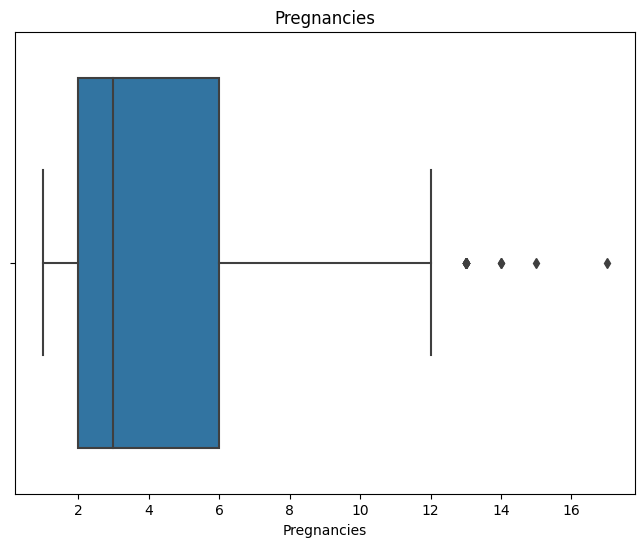

In [1062]:
plt.figure(figsize = (8,6))
sns.boxplot(x=df['Pregnancies'])
plt.title("Pregnancies")

Text(0.5, 1.0, 'Glucose')

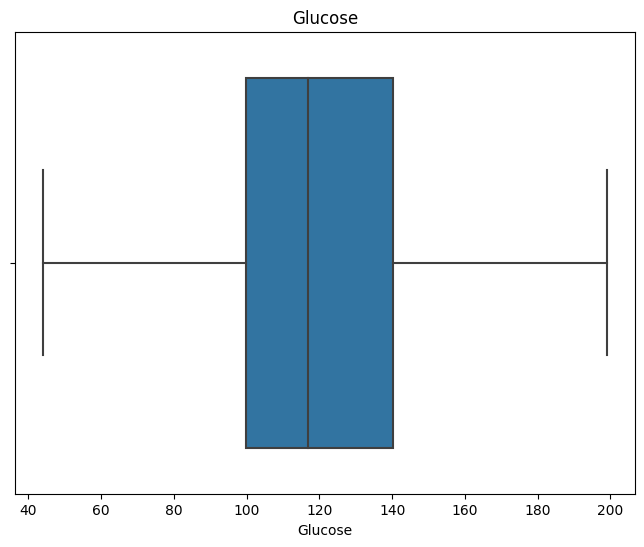

In [1063]:
plt.figure(figsize = (8,6))
sns.boxplot(x=df["Glucose"])
plt.title("Glucose")

In [1064]:
lof =LocalOutlierFactor(n_neighbors= 10)
lof.fit_predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [1065]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:30]

array([-3.30540654, -2.56690795, -2.48947632, -2.27524639, -2.12209489,
       -2.01128734, -1.95512976, -1.95386655, -1.80291669, -1.76990402,
       -1.72455101, -1.71960836, -1.7126251 , -1.67906341, -1.65535005,
       -1.60925053, -1.60048   , -1.59998552, -1.52849351, -1.51794298,
       -1.51264718, -1.50216641, -1.49997493, -1.49976537, -1.49840026,
       -1.47202507, -1.4704764 , -1.46683957, -1.46287303, -1.45971858])

In [1066]:
threshold = np.sort(df_scores)[7]
threshold

-1.9538665533171866

In [1067]:
outlier = df_scores > threshold
df = df[outlier]

In [1068]:
df.shape

(760, 9)

Feature Engineering

Creating new variables is for models. For this dataset, some new variables were created according to BMI, Insulin, and Glucose variables

In [1069]:
NewBMI = pd.Series(["Underweight","Normal","Overweight","Obesity 1","Obesity 2","Obesity 3"],dtype = "category")
df["NewBMI"] = NewBMI
df.loc[df["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"] > 18.5) & (df["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"] > 24.9) & (df["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"] > 29.9) & (df["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"] > 34.9) & (df["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
df.loc[df["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]

C:\Users\yegor\AppData\Local\Temp\ipykernel_15040\3192205666.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["NewBMI"] = NewBMI


In [1070]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6.0,148.0,72.0,35,169.5,33.6,0.627,50,1,Obesity 1
1,1.0,85.0,66.0,29,102.5,26.6,0.351,31,0,Overweight
2,8.0,183.0,64.0,0,169.5,23.3,0.672,32,1,Normal
3,1.0,89.0,66.0,23,94.0,28.1,0.167,21,0,Overweight
4,5.0,137.0,40.0,35,168.0,43.1,2.288,33,1,Obesity 3


In [1071]:
def set_insulin(value):
    if value >= 16 and value <= 166:
        return "Normal"
    else:
        return "Abnormal"

df["NewInsulin"] = df["Insulin"].apply(set_insulin)

C:\Users\yegor\AppData\Local\Temp\ipykernel_15040\4081338189.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["NewInsulin"] = df["Insulin"].apply(set_insulin)


In [1072]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulin
0,6.0,148.0,72.0,35,169.5,33.6,0.627,50,1,Obesity 1,Abnormal
1,1.0,85.0,66.0,29,102.5,26.6,0.351,31,0,Overweight,Normal
2,8.0,183.0,64.0,0,169.5,23.3,0.672,32,1,Normal,Abnormal
3,1.0,89.0,66.0,23,94.0,28.1,0.167,21,0,Overweight,Normal
4,5.0,137.0,40.0,35,168.0,43.1,2.288,33,1,Obesity 3,Abnormal


In [1073]:
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
df["NewGlucose"] = NewGlucose
df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

C:\Users\yegor\AppData\Local\Temp\ipykernel_15040\232394254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["NewGlucose"] = NewGlucose


In [1074]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulin,NewGlucose
0,6.0,148.0,72.0,35,169.5,33.6,0.627,50,1,Obesity 1,Abnormal,Secret
1,1.0,85.0,66.0,29,102.5,26.6,0.351,31,0,Overweight,Normal,Normal
2,8.0,183.0,64.0,0,169.5,23.3,0.672,32,1,Normal,Abnormal,Secret
3,1.0,89.0,66.0,23,94.0,28.1,0.167,21,0,Overweight,Normal,Normal
4,5.0,137.0,40.0,35,168.0,43.1,2.288,33,1,Obesity 3,Abnormal,Secret


One-Hot Encoding

We got some categorical variables(NewBMI,NewInsulin,NewGlucose). Let's use One-Hot Encoding to convert them into numerical variables

In [1075]:
df = pd.get_dummies(df,columns = ["NewBMI","NewInsulin","NewGlucose"],drop_first = True)

In [1076]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulin_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6.0,148.0,72.0,35,169.5,33.6,0.627,50,1,1,0,0,0,0,0,0,0,0,1
1,1.0,85.0,66.0,29,102.5,26.6,0.351,31,0,0,0,0,1,0,1,0,1,0,0
2,8.0,183.0,64.0,0,169.5,23.3,0.672,32,1,0,0,0,0,0,0,0,0,0,1
3,1.0,89.0,66.0,23,94.0,28.1,0.167,21,0,0,0,0,1,0,1,0,1,0,0
4,5.0,137.0,40.0,35,168.0,43.1,2.288,33,1,0,0,1,0,0,0,0,0,0,1


In [1077]:
categorical_df = df[['NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
                     'NewInsulin_Normal','NewGlucose_Normal','NewGlucose_Low', 'NewGlucose_Overweight', 'NewGlucose_Secret']]

In [1078]:
categorical_df.head()

,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewInsulin_Normal,NewGlucose_Normal,NewGlucose_Low,NewGlucose_Overweight,NewGlucose_Secret
0,1,0,0,0,0,0,0,0,1
1,0,0,0,1,1,1,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,0,1,1,1,0,0,0
4,0,0,1,0,0,0,0,0,1


In [1079]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulin_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'],
      dtype='object')

In [1080]:
y = df["Outcome"]
X = df.drop(['Outcome',
       'NewBMI_Obesity 1', 'NewBMI_Obesity 2', 'NewBMI_Obesity 3',
       'NewBMI_Overweight', 'NewBMI_Underweight', 
       'NewInsulin_Normal',  'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'],axis = 1)

In [1081]:
cols = X.columns
index = X.index

In [1082]:

scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=cols, index=index)

In [1083]:
X = pd.concat([X,categorical_df], axis = 1)

In [1084]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewInsulin_Normal,NewGlucose_Normal,NewGlucose_Low,NewGlucose_Overweight,NewGlucose_Secret
0,0.531071,0.884997,-0.037000,0.937963,0.370748,0.184408,0.502894,1.432400,1,0,0,0,0,0,0,0,1
1,-1.128526,-1.209287,-0.546733,0.554228,-0.463365,-0.854179,-0.365098,-0.190500,0,0,0,1,1,1,0,0,0
2,1.194910,2.048488,-0.716643,-1.300492,0.370748,-1.343798,0.644415,-0.105084,0,0,0,0,0,0,0,0,1
3,-1.128526,-1.076317,-0.546733,0.170493,-0.569186,-0.631625,-0.943759,-1.044658,0,0,0,1,1,1,0,0,0
4,0.199152,0.519328,-2.755572,0.937963,0.352074,1.593918,5.726571,-0.019668,0,0,1,0,0,0,0,0,1


In [1085]:
X.shape

(760, 17)

In [1086]:
y.shape

(760,)

In [1087]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [1088]:
sampler = RandomOverSampler()

# Применение метода сэмплирования
X_resampled, y_resampled = sampler.fit_resample(X, y)

# Вывод размеров исходной и сэмплированной выборок
print("Размер исходной выборки:", X.shape, y.shape)
print("Размер сэмплированной выборки:", X_resampled.shape, y_resampled.shape)

Размер исходной выборки: (760, 17) (760,)
Размер сэмплированной выборки: (992, 17) (992,)


In [1089]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [1090]:
y_pred = log_reg.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred) * 100
accuracy = accuracy_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred)*100
recall = recall_score(y_test, y_pred)*100

In [1091]:
metrics_df_lr = pd.DataFrame({'Metric': ['ROC-AUC', 'Accuracy', 'F1','Precision','Recall'],
                          'Value': [roc_auc, accuracy, f1,precision,recall]})



In [1092]:
metrics_df_lr

,Metric,Value
0,ROC-AUC,85.137202
1,Accuracy,86.403509
2,F1,80.503145
3,Precision,80.000000
4,Recall,81.012658


In [1093]:
RFC = RandomForestClassifier()
RFC.fit(X_train,y_train)


RandomForestClassifier()

In [1094]:
y_pred = RFC.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred) * 100
accuracy = accuracy_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred)*100
recall = recall_score(y_test, y_pred)*100


In [1095]:
metrics_df_RFC = pd.DataFrame({'Metric': ['ROC-AUC', 'Accuracy', 'F1','Precision','Recall'],
                          'Value': [roc_auc, accuracy, f1,precision,recall]})

In [1096]:
metrics_df_RFC

,Metric,Value
0,ROC-AUC,87.188854
1,Accuracy,89.473684
2,F1,84.000000
3,Precision,88.732394
4,Recall,79.746835
